In [69]:
# Read pdf pages 45:55 and convert them into text
library(pdftools)
readpage<- pdf_convert('M:\\Imarticus\\ProjectR\\Text mining\\Datafiles\\vsosports.pdf',
                       pages=45:55)
text<- tesseract::ocr(readpage)

Converting page 45 to vsosports_45.png... done!
Converting page 46 to vsosports_46.png... done!
Converting page 47 to vsosports_47.png... done!
Converting page 48 to vsosports_48.png... done!
Converting page 49 to vsosports_49.png... done!
Converting page 50 to vsosports_50.png... done!
Converting page 51 to vsosports_51.png... done!
Converting page 52 to vsosports_52.png... done!
Converting page 53 to vsosports_53.png... done!
Converting page 54 to vsosports_54.png... done!
Converting page 55 to vsosports_55.png... done!


In [70]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
library(tidytext)
library(dplyr)
data(stop_words)

In [71]:
# clean text using stringr
library(stringr)
# Remove alphanumeric characters & punctuation
textnew<- str_replace_all(text, "[[:punct:]]", " ")
textnew<-str_replace_all(textnew, "[^[:alnum:]]", " ")

In [72]:
head(textnew,2)

[1] "Teaching large classes Activity Students are divided into two teams and stand either side ofa centre line  A bench placed behind each eam  Throw approximately fivebll into the playing Volunteers and e2citerside ofthe centre line  Students are then eto roll balto the oer Caters td side  aiming to hit below the knee of the opposing players or the bench behind fallesguesrecommnendl yom  hit  students must stand ou Ifa player hlthe bench of the opposing this Setivity for Taree eam  the members ofthat eam mustall fez while the other team has one free thro Teams ai to avoid the balls rom the opposition iting theirlegs and ty to catch them  This wll prevent the ball rom hitting their ov bench and means players can then ain to climinate the players onthe othe earn  Hitting and kicking skills Hitting  or striking  and kicking sills help to develop timing and balance   Throwing and catching games  and running and jumping games  wil help students develop thei hiting Stiking and kicking sil  Hiting striking illare essential forhockey  volleyball  rounders  cricket and softball  Kicking kills are necessary for fotbal and rugby Stage 1 On yourown Objectives  Toteach students how to move with the ball  dribble  and kick  htor push the  ally introducing them to activites they can practise on their ow Equipment One tick to draw a ine  and one ball per player Please noe that many items  ean be sed fr these activities  sucha rolled up material or paper  Activity 1     Five markers  Activity    Wall space or bench  Activity 3   "
[2] "Safety  Make sre stent are wel spaced  and put them ino sal groups    Activities   Ditbeafonga tine and ret ee   a BF 2 Dribble trough markers and retum  fC in contact with heb  against the wall or bene  and stop the ebound    Repeat   ribbleata slower pace Activites 1 and2   pice the markers fhe pat  Actvty2   stand close tothe wall orbenchand catch the rebound th the hands  civ  Tomake th ativities more dieu   ribbleata faster pace Activites and2   poe the markerscloser together  Activity 2    stand futher rm the wal or bench Activity   TEACHING POINTS Askthe throwers   How can you keep contro ofthe ball  Keep the bl lose to your fot or stick  oo where you ae going andonly goa fist as you can contol Activites and    What en you do to help youstop the rebound  Watch the rebound closely nd make sure your fot or sick isbehind the all  Sage 2 n palls Objectives Tobelp students learn howto kick  itor push he bal by introducing emto pasties they con doin pi Equipineat   One all per pir Please not that many tems can be used for these stv  soca olled up material or paper   Wall  bench space or barre per pi  Safety   Make sre pis are well paced "

In [73]:
var <- Corpus(VectorSource(textnew))

# Convert the text to lower case
var <- tm_map(var, content_transformer(tolower))
# Remove numbers
var <- tm_map(var, removeNumbers)
# Remove english common stopwords
var <- tm_map(var, removeWords, stopwords("english"))

# Remove own stop word
var <- tm_map(var, removeWords,c("bal","onthe","stand","tomake","eam","move",
                                 "wall","makers","ofthe","rom","ean","objectives",
                                 "tothe","tomakethe","ges","sls","moe","pas",
                                 "pis","pir","suchas","sed","ake","youre","itor",
                                 "con","othe","nee","ths","sre","ret","ain","atts")) 
# Eliminate extra white spaces
var <- tm_map(var, stripWhitespace)


Warning message in tm_map.SimpleCorpus(var, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeWords, c("bal", "onthe", "stand", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, stripWhitespace):
"transformation drops documents"

In [5]:
dtm <- TermDocumentMatrix(var)
matrix <- as.matrix(dtm)
sorted_sum <- sort(rowSums(matrix),decreasing=TRUE)
table <- data.frame(word = names(sorted_sum ),freq=sorted_sum )
table <- table %>% anti_join(stop_words)


Joining, by = "word"
Warning message:
"Column `word` joining factor and character vector, coercing into character vector"

In [75]:
#top 50 words
top50_words<-head(table,50)
top50_words

word,freq
player,42
ball,25
students,24
team,18
activity,16
players,15
teams,12
games,11
goal,10
activites,9


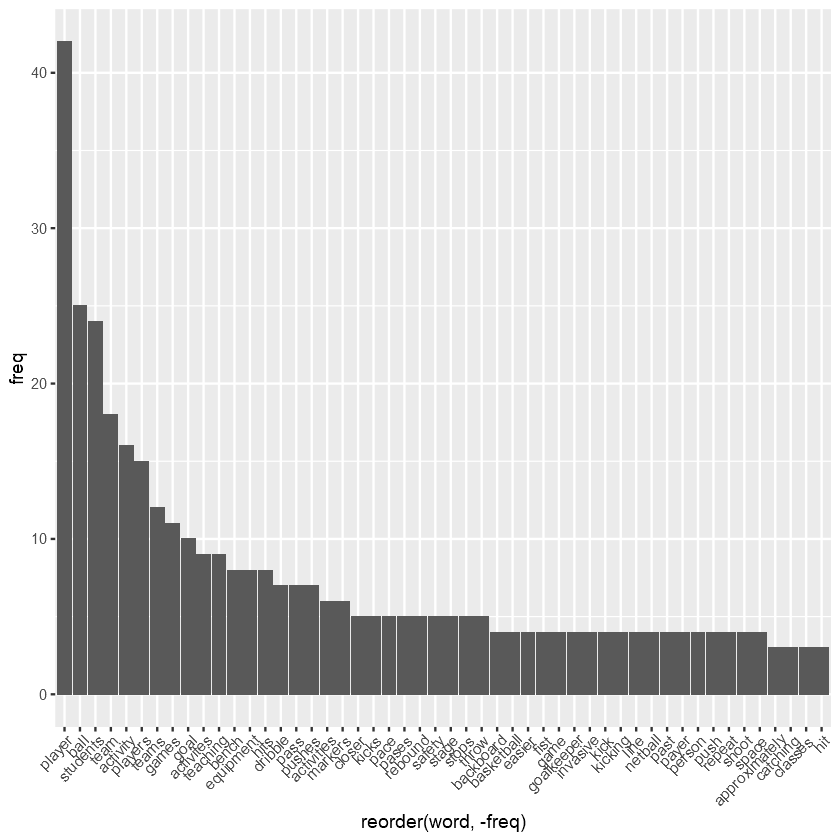

In [76]:
#word frequency plot
library(ggplot2)
ggplot(top50_words, aes(x= reorder(word, -freq), y = freq)) +
  geom_bar(stat = "identity")+ 
 theme(axis.text.x=element_text(angle=45, hjust=1))

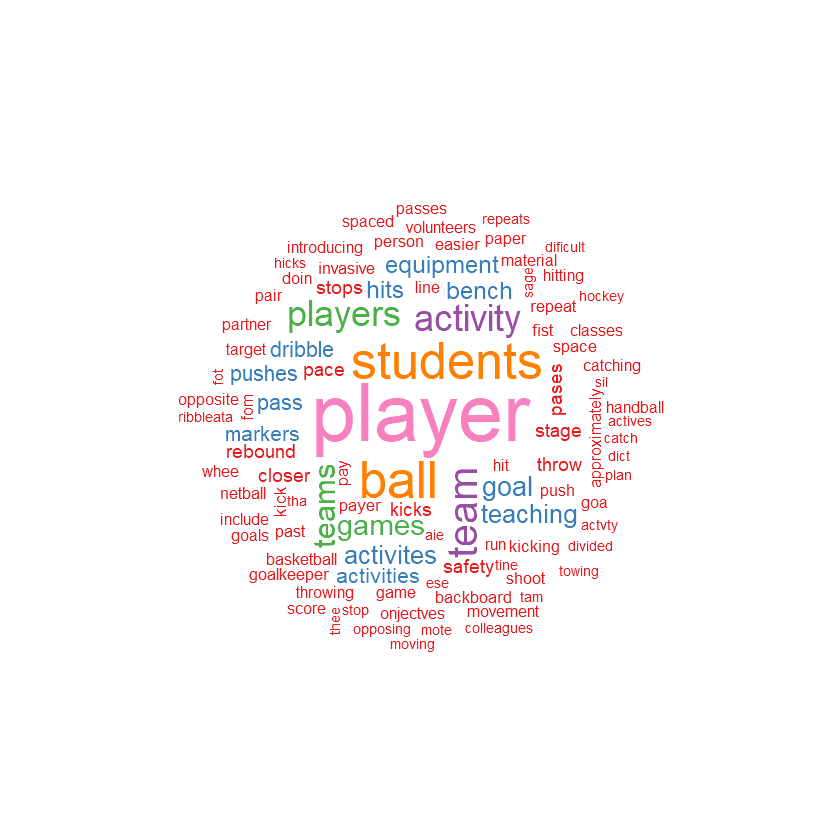

In [77]:
#wordcloud
set.seed(1234)
wordcloud(words = table$word, freq = table$freq, min.freq = 1,
          max.words=100, random.order=FALSE, 
          colors=brewer.pal(8, "Set1"))

In [40]:
top25_words<-head(table,25)


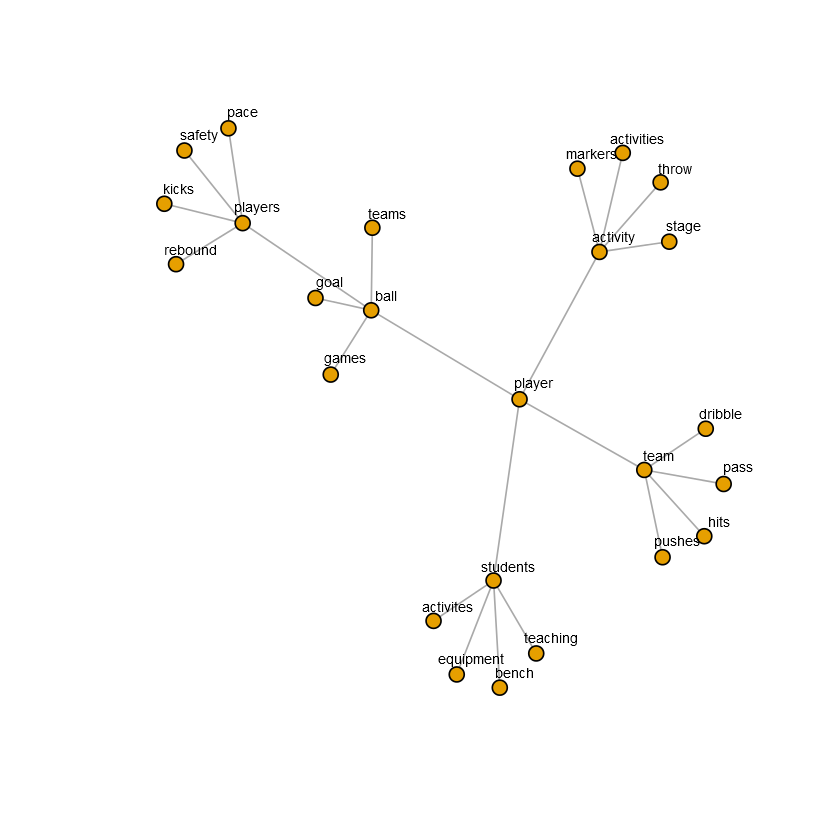

In [78]:
#Tree plot
library(igraph)
tr <- make_tree(25, children =4, mode = "undirected")

plot(tr, vertex.size=5, vertex.label=top25_words$word,
     vertex.label.dist=1,vertex.label.color="black", vertex.label.cex=0.7) 

In [39]:
net_graph=data.frame(head(table,50))
net_graph=net_graph[12:38,]
net_graph

,word,freq
12,bench,8
13,equipment,8
14,hits,8
15,dribble,7
16,pass,7
17,pushes,7
18,activities,6
19,markers,6
20,stage,5
21,throw,5


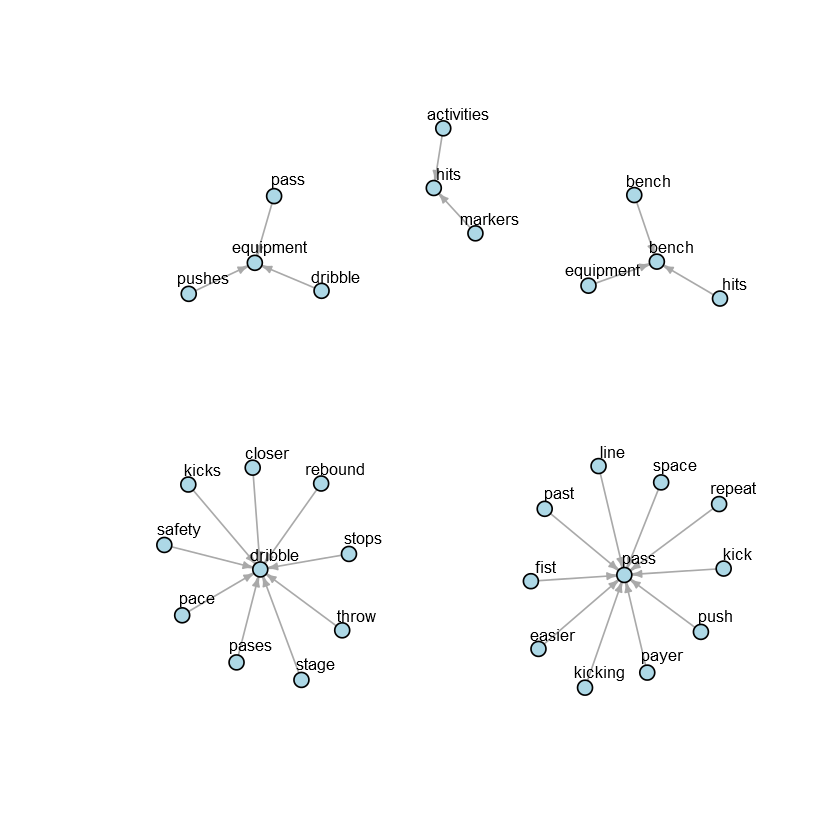

In [80]:
#network plot
net <- graph_from_data_frame(d=net_graph, directed=T)
#plot(net)
plot(net, edge.arrow.size=.4,vertex.label=net_graph$word,
    vertex.label.dist=1,vertex.label.dist=1,vertex.size=5,edge.arrow.size=.7, 
    vertex.color="lightblue",vertex.frame.color="black", vertex.label.color="black",
    vertex.label.cex=0.8)